In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Create Trianing

In [17]:
# Feature set containing 25 * 2 for 25 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 25 * 1 values
responses = np.random.randint(0,3,(25,1)).astype(np.float32) #responses 25 x 1 matrix 

In [18]:
print ("Training Data:\n", trainData)
#print("\n Responses:\n", responses)
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D. 
#color 0 is "Red", color 1 is "blue", color 2 is "yellow"

Training Data:
 [[96. 10.]
 [27.  1.]
 [54. 23.]
 [83. 82.]
 [73. 54.]
 [65.  4.]
 [43. 80.]
 [87. 38.]
 [ 8. 23.]
 [79. 99.]
 [27.  7.]
 [73. 83.]
 [49. 12.]
 [66. 36.]
 [48. 29.]
 [37. 95.]
 [42. 69.]
 [28. 75.]
 [86. 99.]
 [28. 38.]
 [66. 21.]
 [95. 89.]
 [ 8. 52.]
 [45. 95.]
 [69. 87.]]
Responses Ravel or flattened as 1-D:
 [2. 1. 1. 0. 2. 2. 0. 1. 2. 1. 0. 2. 2. 1. 2. 0. 2. 2. 1. 1. 2. 0. 1. 2.
 2.]


In [19]:
# Make red, blue, yellow
red = trainData[responses.ravel()==0] #red is now trained data with responses of 0
print(red)
blue = trainData[responses.ravel()==1] #blue is now the trained data with responses of 1 
print(blue)
yellow = trainData[responses.ravel()==2] #yellow is now the trained data with responses of 2
print(yellow)

[[83. 82.]
 [43. 80.]
 [27.  7.]
 [37. 95.]
 [95. 89.]]
[[27.  1.]
 [54. 23.]
 [87. 38.]
 [79. 99.]
 [66. 36.]
 [86. 99.]
 [28. 38.]
 [ 8. 52.]]
[[96. 10.]
 [73. 54.]
 [65.  4.]
 [ 8. 23.]
 [73. 83.]
 [49. 12.]
 [48. 29.]
 [42. 69.]
 [28. 75.]
 [66. 21.]
 [45. 95.]
 [69. 87.]]


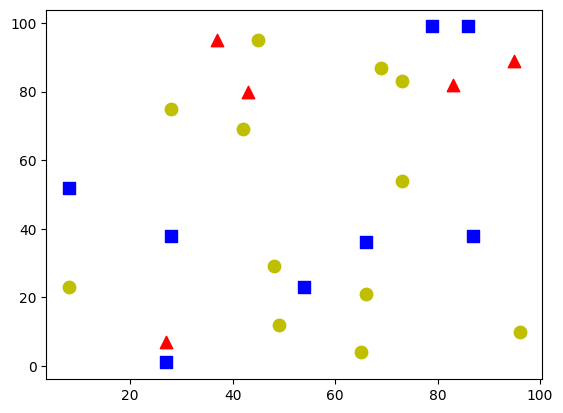

In [20]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:,0],red[:,1],80,'r','^') #size 80, red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #size 80, blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'y','o') #size 80, yellow, circle
plt.show()
#plt.savefig('graph_no_newcomer.png')

### Test unknow data

In [21]:
#create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
print(newcomer)

[[42. 18.]]


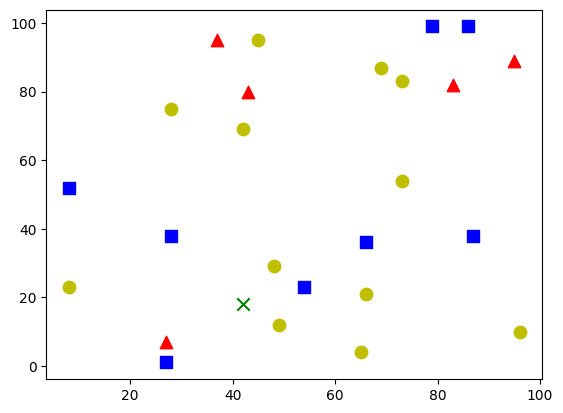

In [22]:
plt.scatter(red[:,0],red[:,1],80,'r','^') #red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'y','o') #yellow, circle
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','x') #green, x
plt.show()
#plt.savefig('graph_newcomer.png', format='png')

In [23]:
knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
k=4
ret, results, neighbours, dist = knn.findNearest(newcomer, k)

In [24]:
results = results.ravel().astype(int)
neighbours = neighbours.ravel().astype(int).astype(str)
dist = dist.ravel().astype(int)

In [25]:
if results[0] == 0:
    results = "Red"
elif results[0] == 1:
    results = "Blue"
elif results[0] == 2:
    results = "Yellow"

for i in range(k):
    if neighbours[i] == '0':
        neighbours[i] = "Red"
    elif neighbours[i] == '1':
        neighbours[i] = "Blue"
    elif neighbours[i] == '2':
        neighbours[i] = "Yellow"


In [26]:
print("Result: ", results)
print("Nearest Neighbors: ", neighbours)
print("Distance: ", dist)

Result:  Yellow
Nearest Neighbors:  ['Yellow' 'Yellow' 'Blue' 'Red']
Distance:  [ 85 157 169 346]
